# #GripApril2023

### -------------------------The Spark Foundation:Data Science and Business Internship 2023--------------------------------------
### Task1
### Statement - Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
### Author - Ananya Rakesh

# Importing Important Libraries

In [1]:
#loading the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Importing Datsets

In [2]:
mac=pd.read_csv('matches.csv')

In [3]:
de=pd.read_csv('deliveries.csv')

#### View 5 Rows of both Datsets

In [83]:
mac.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [84]:
de.head(5)

,id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


# Check null values in both datasets

In [6]:
mac.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [7]:
de.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

## Dropping Columns Which have most Null values 

In [8]:
mac.drop(columns=['umpire3'],inplace=True)

In [9]:
de.drop(columns=['player_dismissed','dismissal_kind','fielder'],inplace=True)

In [10]:
mac.dropna(inplace=True)

## Check for noise in both datsets

In [11]:
for i in mac.columns:
    print(i)
    print(mac[i].unique(),end='\n\n')

id
[    1     2     3     4     6     7     8     9    10    11    12    13
    14    15    16    17    18    19    20    21    22    23    24    25
    26    27    28    29    30    31    32    33    34    35    36    37
    38    39    40    41    42    43    44    45    46    47    48    49
    50    51    52    53    54    55    56    57    58    59    60    61
    62    63    64    65    66    67    68    69    70    71    72    73
    74    75    76    77    78    79    80    81    82    83    84    85
    86    87    88    89    90    91    92    93    94    95    96    97
    98    99   100   101   102   103   104   105   106   107   108   109
   110   111   112   113   114   115   116   117   118   119   120   121
   122   123   124   125   126   127   128   129   130   131   132   133
   134   135   136   137   138   139   140   141   142   143   144   145
   146   147   148   149   150   151   152   153   154   155   156   157
   158   159   160   161   162   163   164   165

In [12]:
for i in de.columns:
    print(i)
    print(de[i].unique(),end='\n\n')

match_id
[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163

## Check Data Type of Each Column

In [13]:
mac.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

In [14]:
de.dtypes

match_id          int64
inning            int64
batting_team     object
bowling_team     object
over              int64
ball              int64
batsman          object
non_striker      object
bowler           object
is_super_over     int64
wide_runs         int64
bye_runs          int64
legbye_runs       int64
noball_runs       int64
penalty_runs      int64
batsman_runs      int64
extra_runs        int64
total_runs        int64
dtype: object

## Statical Summary of the Datsets

In [15]:
mac.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,743.000000,743.000000,743.000000,743.000000,743.000000
mean,1786.578735,2013.418573,0.025572,13.460296,3.375505
std,3455.045846,3.378787,0.157961,23.626205,3.393397
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,187.500000,2011.000000,0.000000,0.000000,0.000000
50%,374.000000,2013.000000,0.000000,0.000000,4.000000
75%,567.500000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [16]:
de.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


# Top 5 Run Chasing Teams

In [88]:
mac[(mac['toss_decision']=='field')].groupby('toss_winner').aggregate({'win_by_wickets':'sum'}).sort_values(by='win_by_wickets',ascending=False).head(5)

,win_by_wickets
toss_winner,
Kolkata Knight Riders,235
Royal Challengers Bangalore,200
Mumbai Indians,187
Kings XI Punjab,171
Chennai Super Kings,153


In [18]:
#Insight
#top 5 Run chasing IPL teams are 
#kolkata
# Bangalore
# punjab
# Mumbai
# Delhi Daredevils	

# Best  winning on Wicket taking

In [19]:
mac[(mac['toss_decision']=='bat')].groupby('toss_winner').aggregate({'winner':'count'}).sort_values(by='winner',ascending=False)

,winner
toss_winner,
Chennai Super Kings,48
Mumbai Indians,43
Rajasthan Royals,32
Kolkata Knight Riders,29
Delhi Daredevils,28
Kings XI Punjab,26
Deccan Chargers,24
Royal Challengers Bangalore,19
Sunrisers Hyderabad,19


In [20]:
#Chennai Super Kings
# Mumbai Indians	
# Rajasthan Royals
# Kolkata Knight Riders

# winning percentage of each Team

In [21]:
Totalmatches=pd.concat([mac['team1'],mac['team2']])

In [22]:
mac2=Totalmatches.value_counts().reset_index()

In [23]:
mac2.columns=['Teams','Total_matches']

In [24]:
mac2['winnings']=mac['winner'].value_counts().reset_index()['winner'].values

In [25]:
mac2

,Teams,Total_matches,winnings
0,Mumbai Indians,184,109
1,Kolkata Knight Riders,177,98
2,Kings XI Punjab,175,92
3,Royal Challengers Bangalore,174,82
4,Chennai Super Kings,162,81
5,Delhi Daredevils,156,75
6,Rajasthan Royals,144,66
7,Sunrisers Hyderabad,105,56
8,Deccan Chargers,75,29
9,Pune Warriors,45,13


In [26]:
mac2['winning_precentege']=(mac2['winnings']/mac2['Total_matches'])*100

In [27]:
mac2

,Teams,Total_matches,winnings,winning_precentege
0,Mumbai Indians,184,109,59.239130
1,Kolkata Knight Riders,177,98,55.367232
2,Kings XI Punjab,175,92,52.571429
3,Royal Challengers Bangalore,174,82,47.126437
4,Chennai Super Kings,162,81,50.000000
5,Delhi Daredevils,156,75,48.076923
6,Rajasthan Royals,144,66,45.833333
7,Sunrisers Hyderabad,105,56,53.333333
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,45,13,28.888889


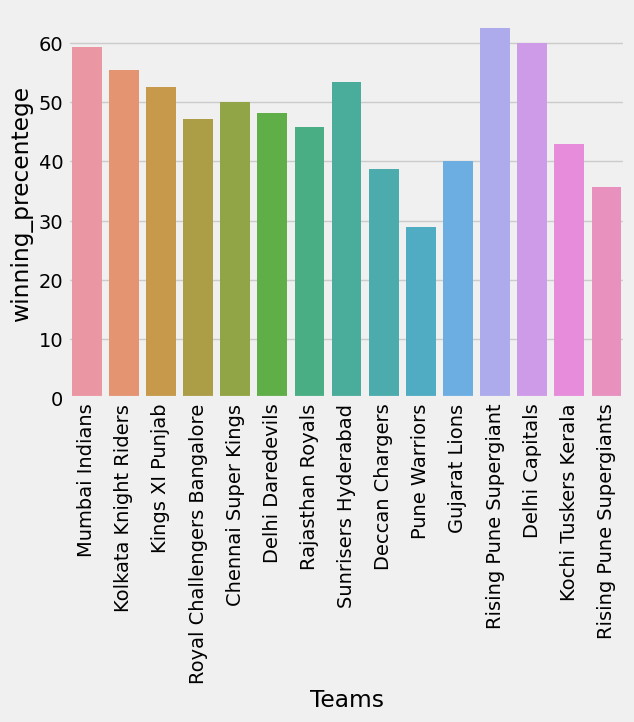

In [28]:
sns.barplot(data=mac2,x='Teams',y='winning_precentege')
sns.color_palette("rocket")
plt.xticks(rotation=90)
plt.show()

##  Bowlers which give most extra run

In [29]:
de.rename(columns={'match_id':'id'},inplace=True)

In [30]:
join=mac.merge(de,on='id')

In [31]:
extra=de.groupby(['bowler']).aggregate({'extra_runs':'sum'}).reset_index()

In [32]:
extra1=extra.sort_values(by='extra_runs',ascending=False).head(10)

<Figure size 1000x4000 with 0 Axes>

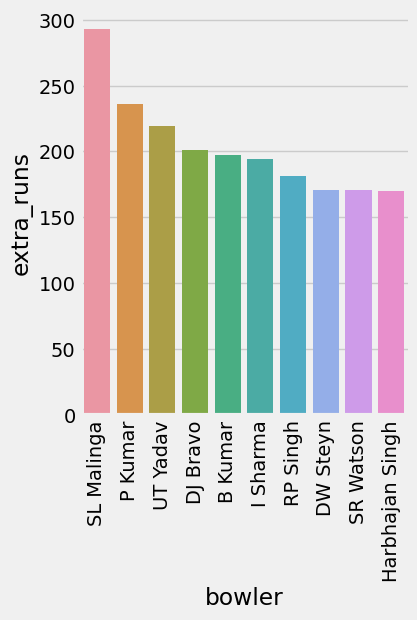

In [33]:
plt.figure(figsize=(10,40))
sns.catplot(x='bowler',y='extra_runs',kind='bar',data=extra1)
plt.xticks(rotation=90)
plt.show()

# Players who won most man of the matches

In [34]:
man1=mac.groupby(['player_of_match']).aggregate({'team1':'count'}).reset_index()

In [35]:
man2=man1.sort_values(by='team1',ascending=False).head(10)

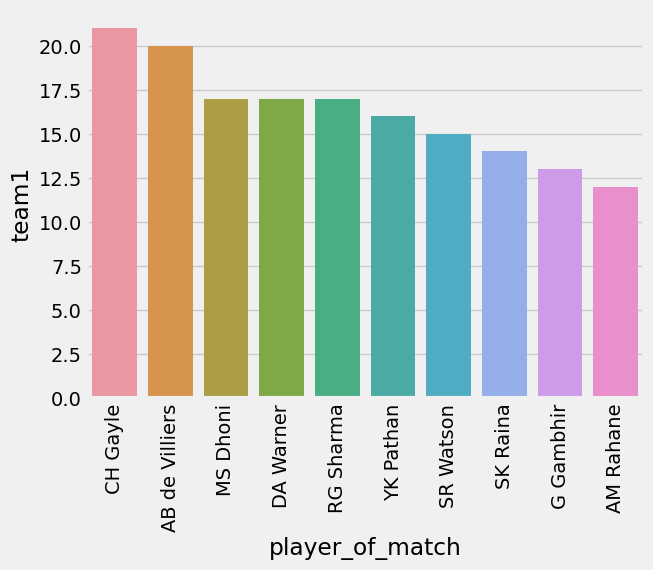

In [36]:
sns.barplot(data=man2,x='player_of_match',y='team1')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Chris Hennry Gayle is the player who won many man of the matches

#  No  of  teams who played super overs

In [38]:
play_match=de['batsman'].value_counts().reset_index()

In [39]:
join[(join['is_super_over']==1)].groupby(['batting_team','bowling_team']).aggregate({'id':'count'})

id
batting_team                bowling_team                   
Chennai Super Kings         Kings XI Punjab               5
Delhi Daredevils            Royal Challengers Bangalore   6
Gujarat Lions               Mumbai Indians                8
Kings XI Punjab             Chennai Super Kings           4
                            Rajasthan Royals              7
Kolkata Knight Riders       Rajasthan Royals             13
Mumbai Indians              Gujarat Lions                 5
Rajasthan Royals            Kings XI Punjab               4
                            Kolkata Knight Riders        10
Royal Challengers Bangalore Delhi Daredevils              6
                            Sunrisers Hyderabad           6
Sunrisers Hyderabad         Royal Challengers Bangalore   7

# Highest Run Scorer till now in IPL

In [40]:
bt=de.groupby('batsman').aggregate({'batsman_runs':'sum'}).reset_index()

In [41]:
high=join.groupby(['season','batsman']).aggregate({'batsman_runs':'sum'}).reset_index()

In [42]:
bt['rank']=bt['batsman_runs'].rank(method='dense',ascending=False)

In [43]:
op=bt.sort_values(by='rank',ascending=True).head(10)

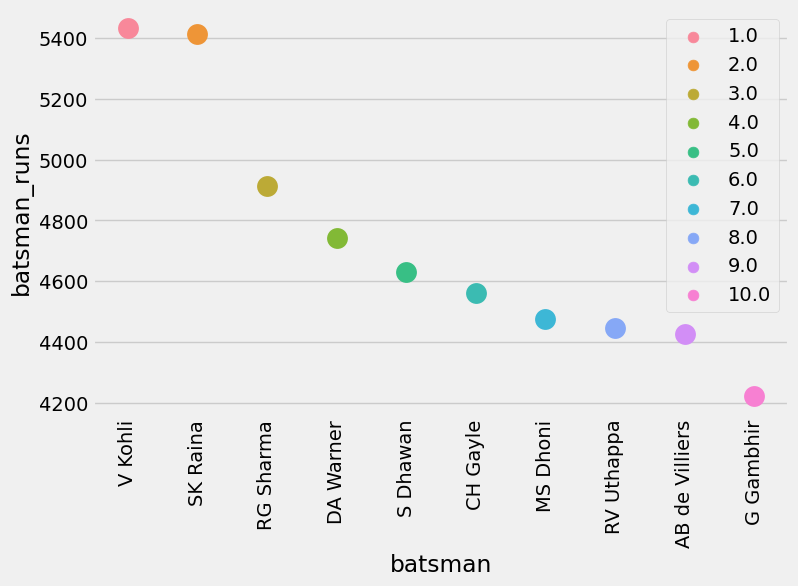

In [44]:
plt.figure(figsize=(8,5))
sns.swarmplot(data=op,x='batsman',y='batsman_runs',hue='rank',size=15)
plt.xticks(rotation=90)
plt.legend(loc='best')

In [ ]:
# Virat kohli is the highest run scorer till now in ipl

# Umpires which are present many matches

In [45]:
um=pd.concat([mac['umpire1'],mac['umpire2']]).value_counts().to_frame().reset_index()

In [46]:
um.rename(columns={0:'Matches','index':'umpire'},inplace=True)

In [47]:
um2=um.sort_values(by='Matches',ascending=False).head(20)

<Figure size 1000x1000 with 0 Axes>

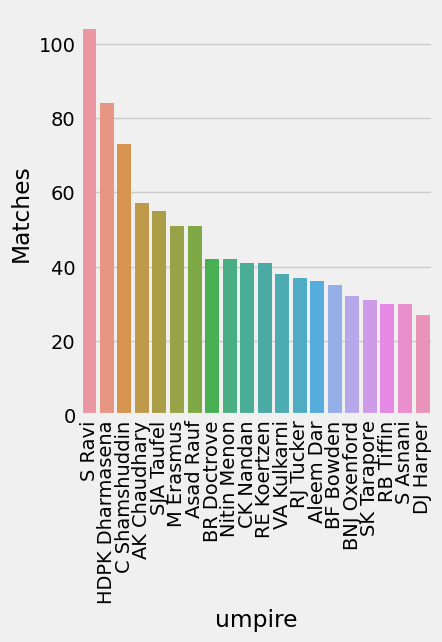

In [48]:
plt.figure(figsize=(10,10))
sns.catplot(x='umpire',y='Matches',kind='bar',data=um2,legend=True)
plt.xticks(rotation=90)
plt.show()

In [49]:
# S Ravi is the umpire who umpired in most of the matches

##  Which stadium host maximum number of matches

In [50]:
ven=mac.groupby('venue').aggregate({'id':'count'}).reset_index()

In [51]:
ven.sort_values(by='id',ascending=False)

,venue,id
7,Eden Gardens,77
39,Wankhede Stadium,73
16,M Chinnaswamy Stadium,70
8,Feroz Shah Kotla,66
27,"Rajiv Gandhi International Stadium, Uppal",56
19,"MA Chidambaram Stadium, Chepauk",49
31,Sawai Mansingh Stadium,47
26,"Punjab Cricket Association Stadium, Mohali",35
20,Maharashtra Cricket Association Stadium,21
36,Subrata Roy Sahara Stadium,17


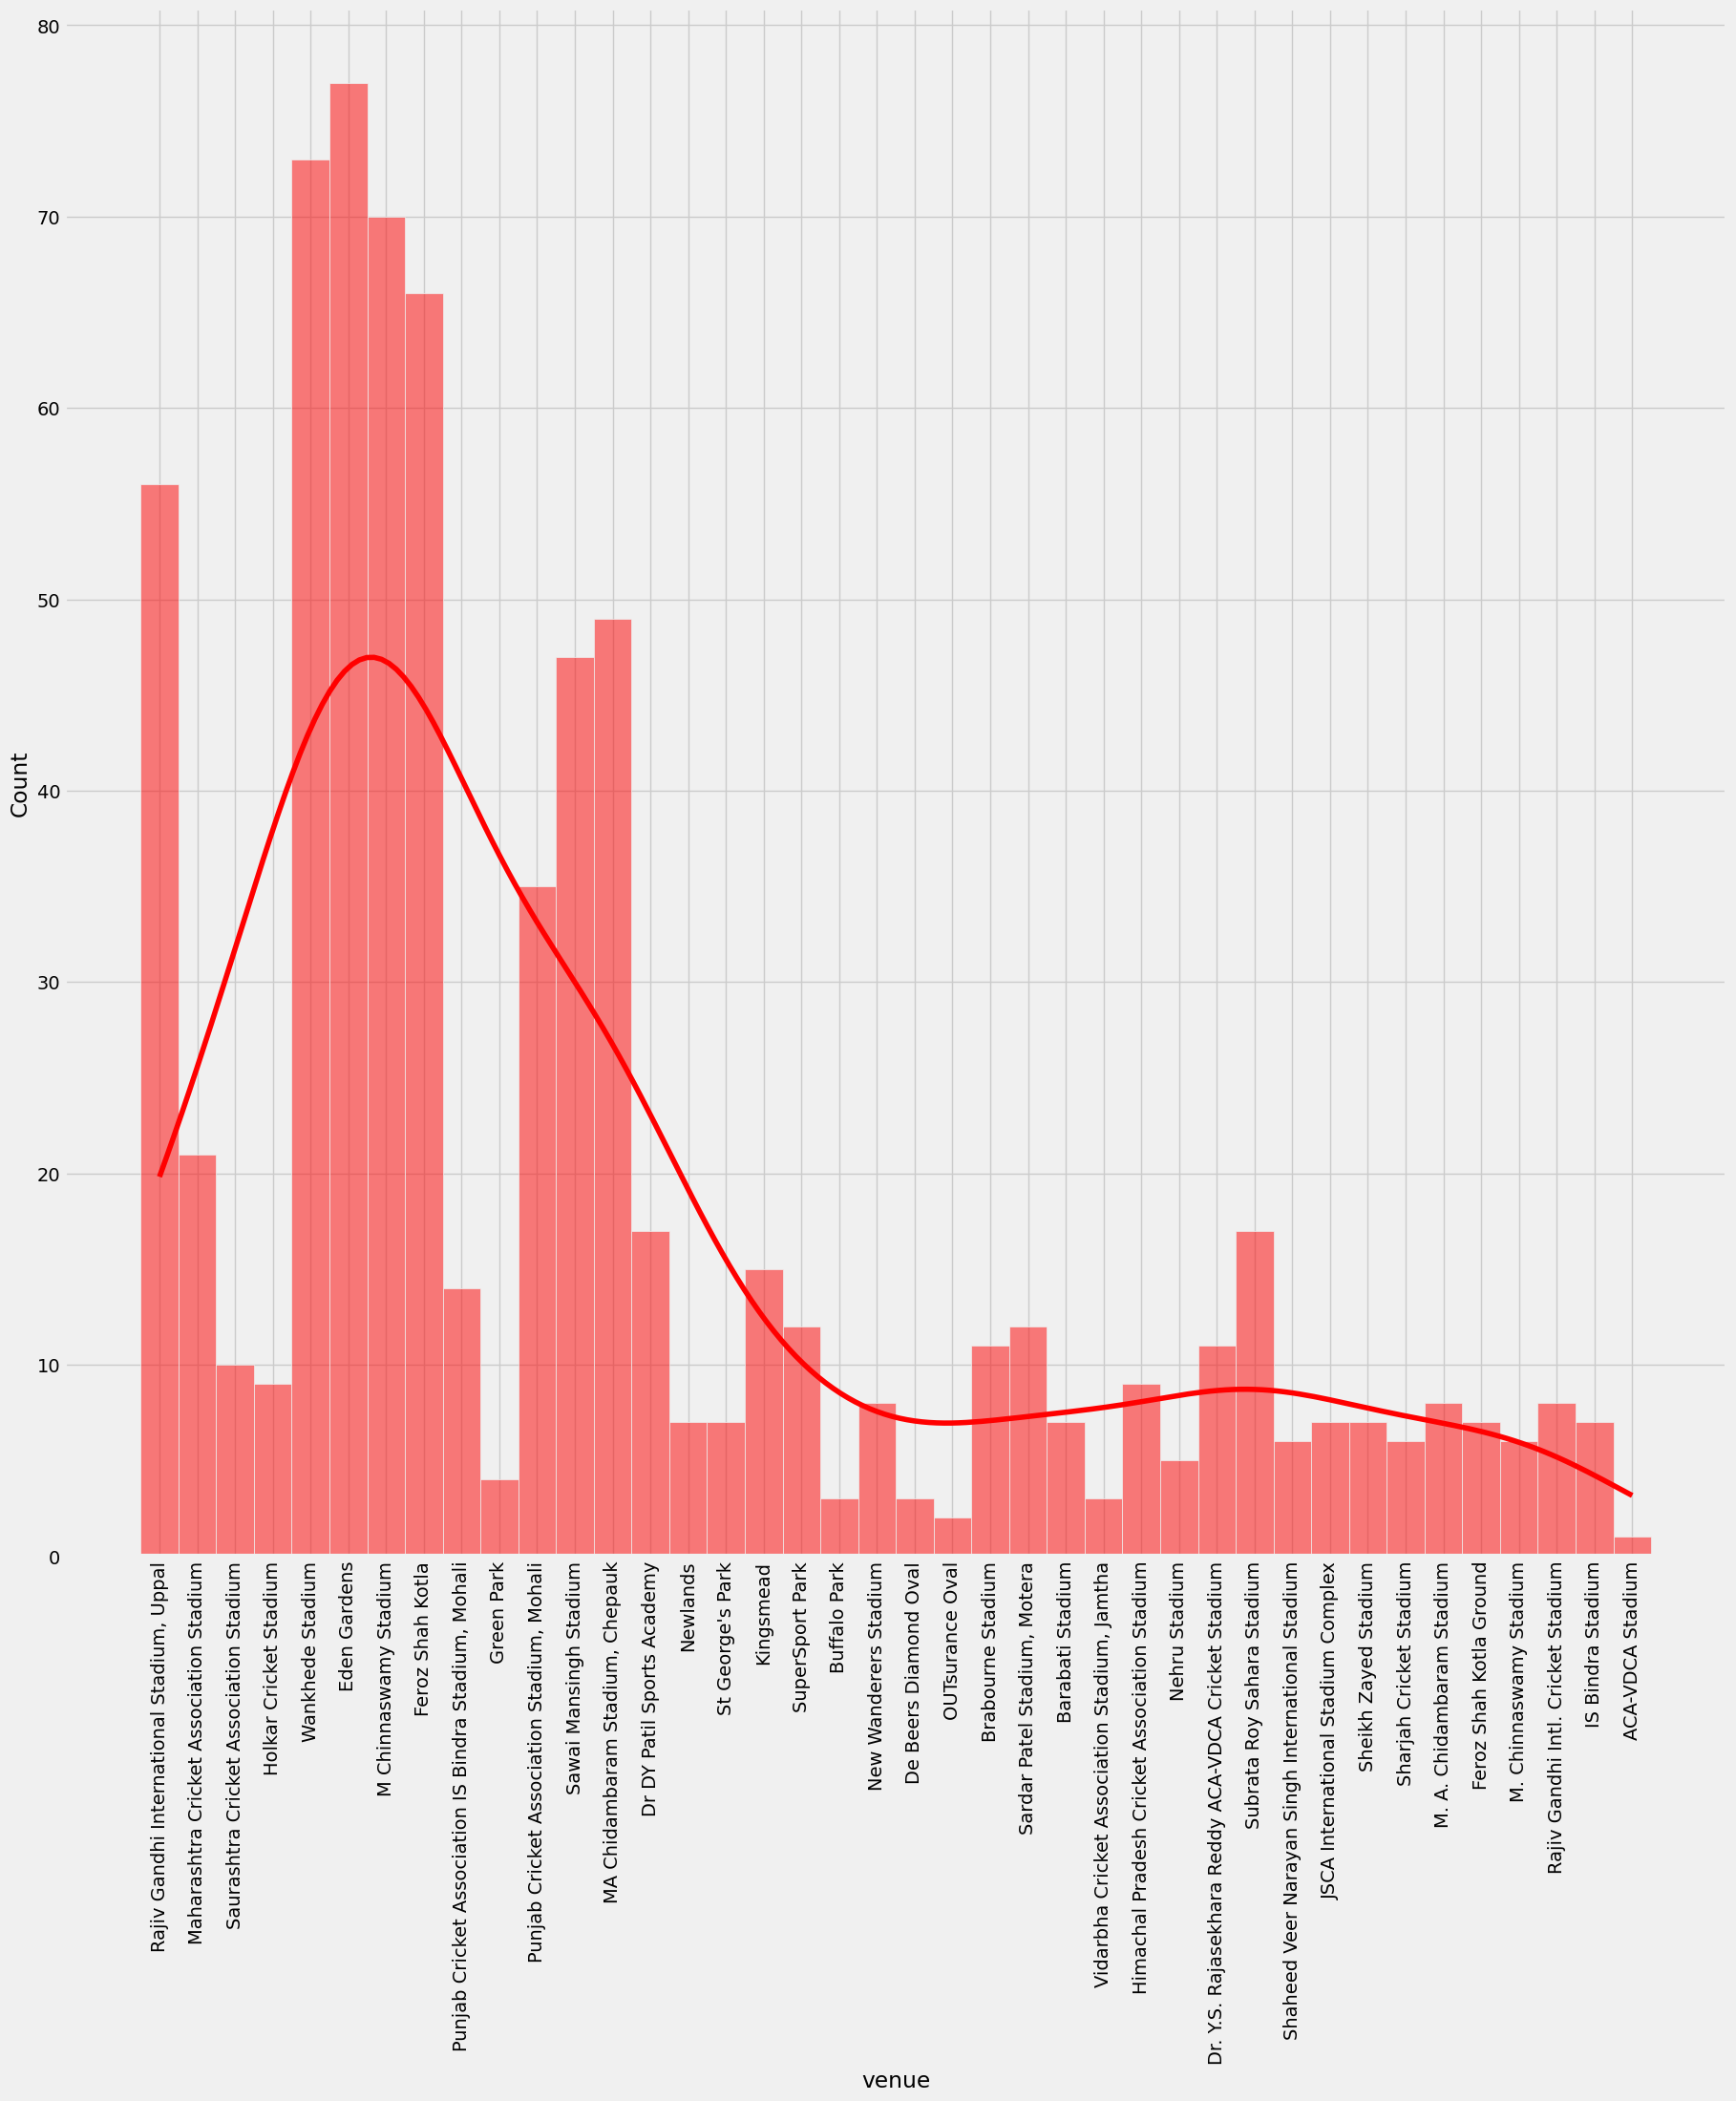

In [52]:
plt.figure(figsize=(20,20))
sns.histplot(data=mac['venue'],kde=True,color='red')
plt.xticks(rotation=90)
plt.show()

In [53]:
#Most of the matches are played in Eden Garden kolkata and wankhade 

In [54]:
mac.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

## Relation with toss  and Match winner in each match 

In [56]:
mac2=mac[['toss_winner','winner']].value_counts().to_frame().reset_index()

In [58]:
mac2.rename(columns={0:'winner1'},inplace=True)

In [59]:
mac2.reset_index()

,index,toss_winner,winner,winner1
0,0,Chennai Super Kings,Chennai Super Kings,57
1,1,Mumbai Indians,Mumbai Indians,56
2,2,Kolkata Knight Riders,Kolkata Knight Riders,53
3,3,Rajasthan Royals,Rajasthan Royals,42
4,4,Royal Challengers Bangalore,Royal Challengers Bangalore,39
...,...,...,...,...
115,115,Rising Pune Supergiants,Kolkata Knight Riders,1
116,116,Mumbai Indians,Delhi Capitals,1
117,117,Rising Pune Supergiants,Royal Challengers Bangalore,1
118,118,Delhi Daredevils,Gujarat Lions,1


In [60]:
mac2[(mac2['toss_winner']==mac2['winner'])]

,toss_winner,winner,winner1
0,Chennai Super Kings,Chennai Super Kings,57
1,Mumbai Indians,Mumbai Indians,56
2,Kolkata Knight Riders,Kolkata Knight Riders,53
3,Rajasthan Royals,Rajasthan Royals,42
4,Royal Challengers Bangalore,Royal Challengers Bangalore,39
5,Delhi Daredevils,Delhi Daredevils,35
6,Kings XI Punjab,Kings XI Punjab,34
7,Sunrisers Hyderabad,Sunrisers Hyderabad,22
8,Deccan Chargers,Deccan Chargers,19
9,Gujarat Lions,Gujarat Lions,10


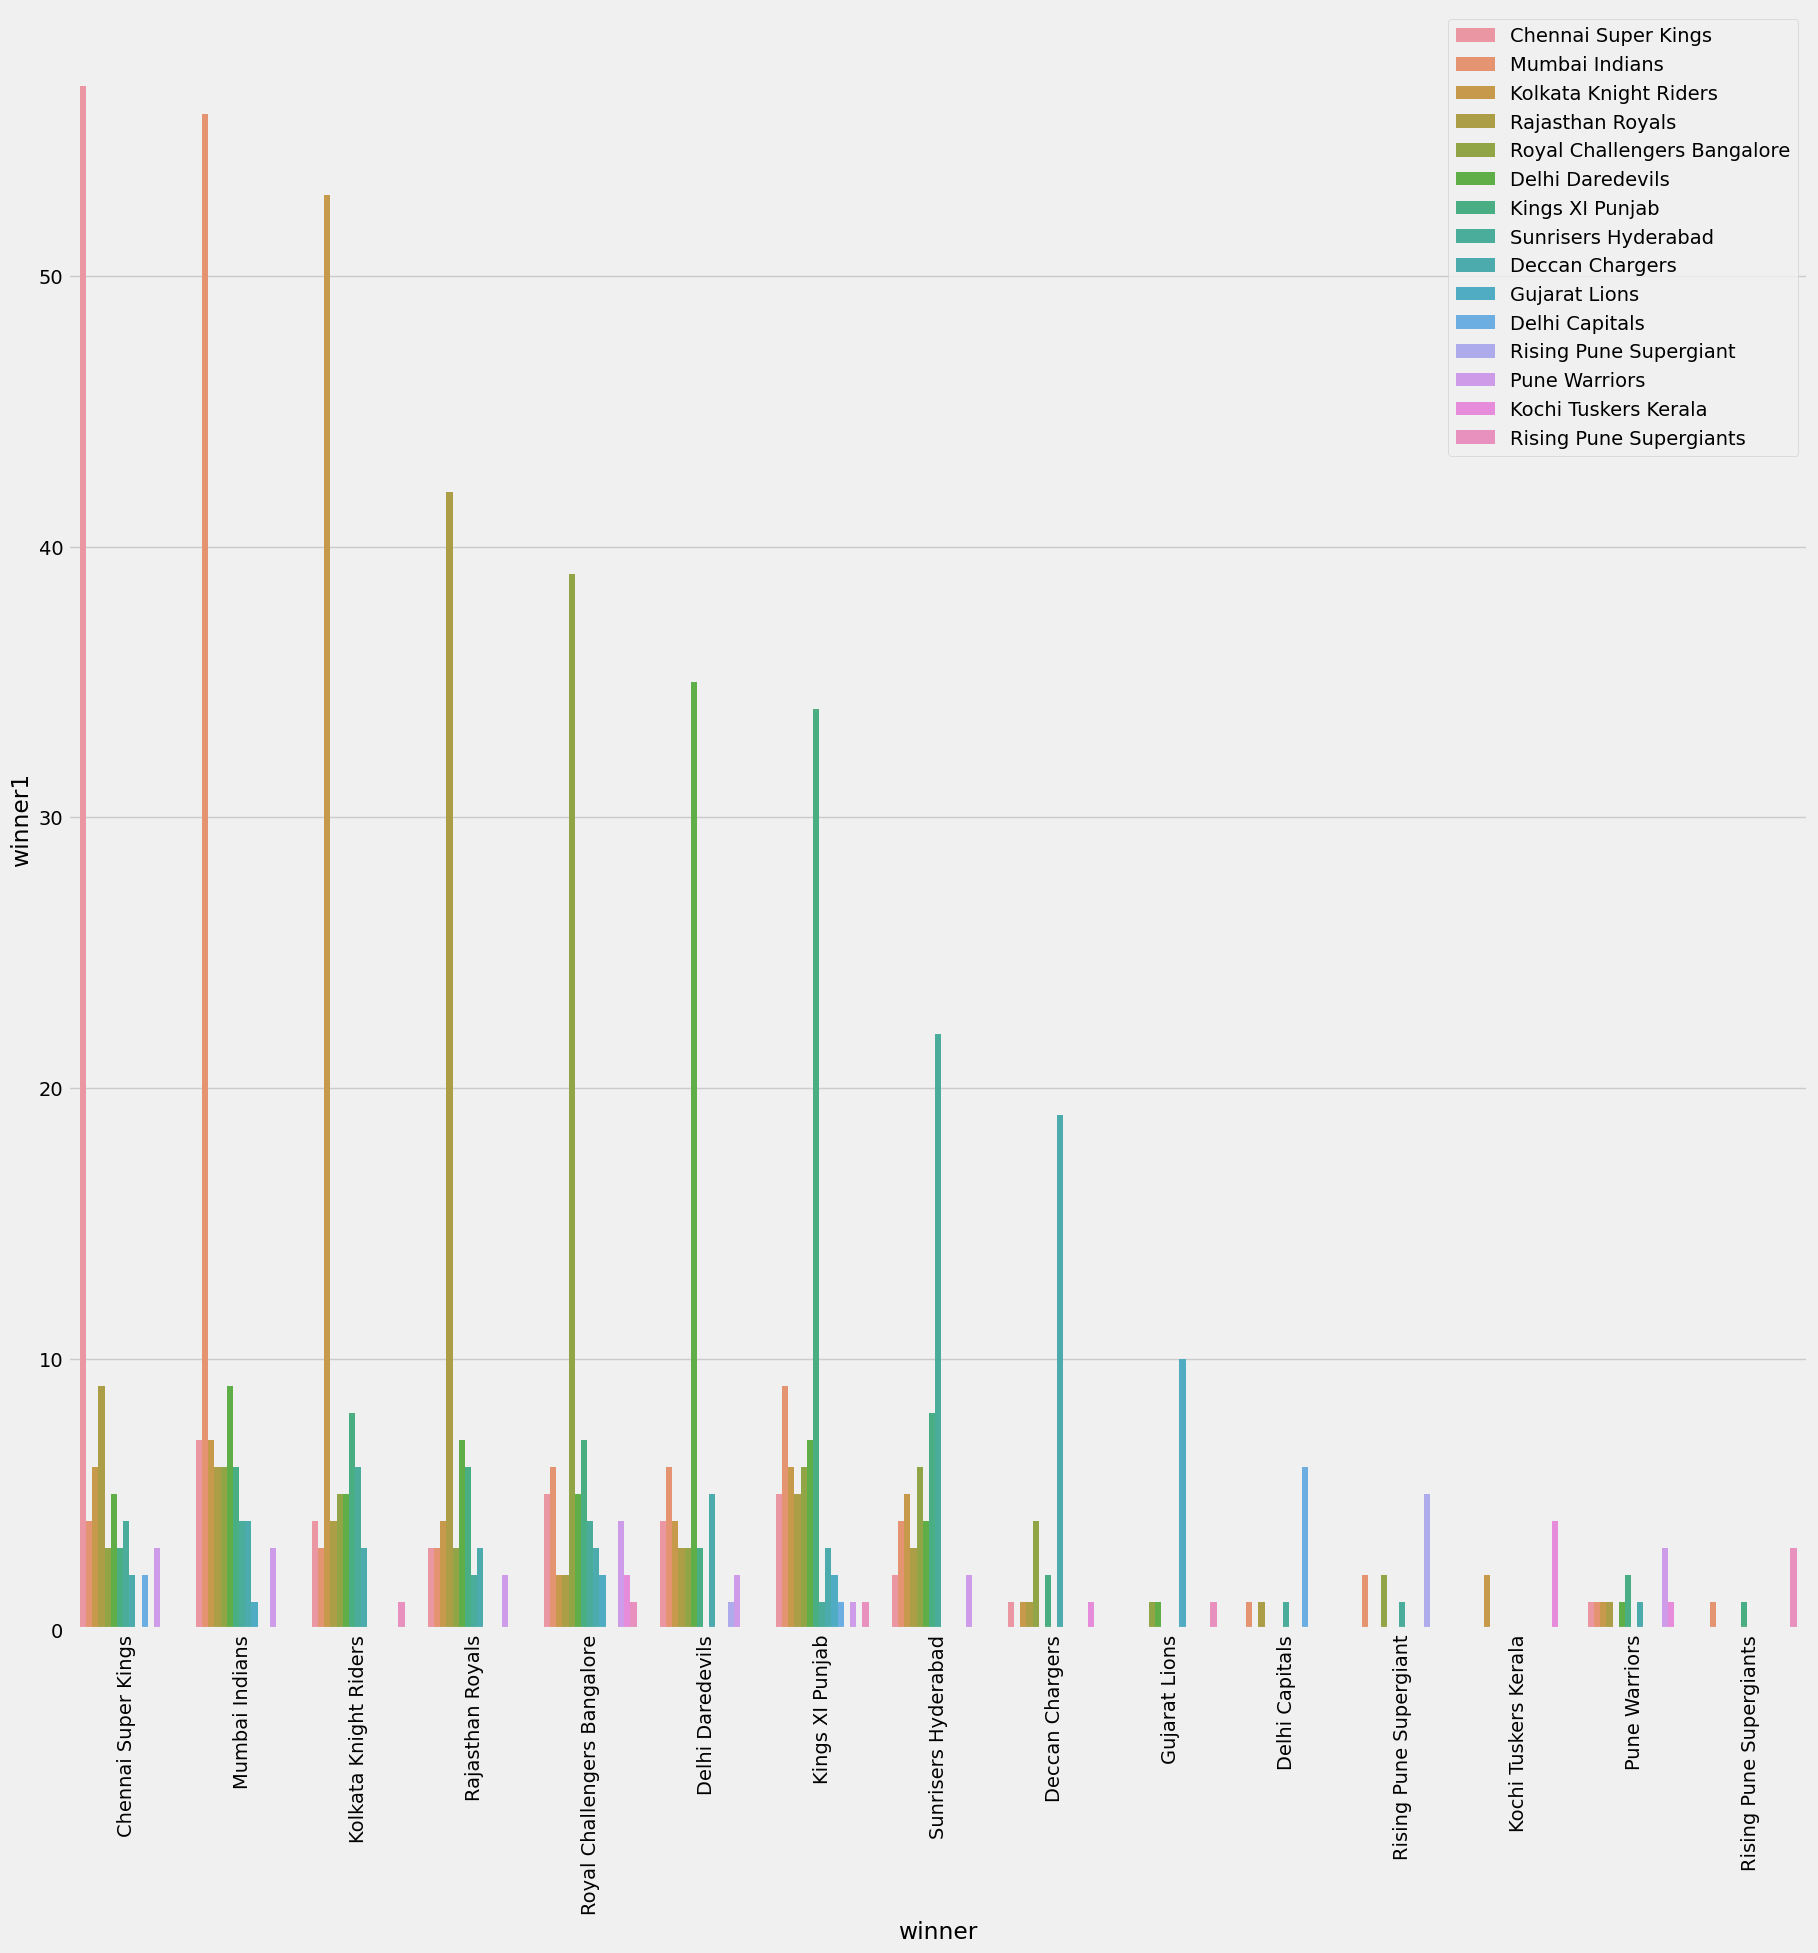

In [61]:
plt.figure(figsize=(20,20))
sns.barplot(data=mac2,x='winner',y='winner1',hue='toss_winner')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

In [62]:
# Teams who win maximum toss_winner are also those teams win most matches there direct positve relation between them.

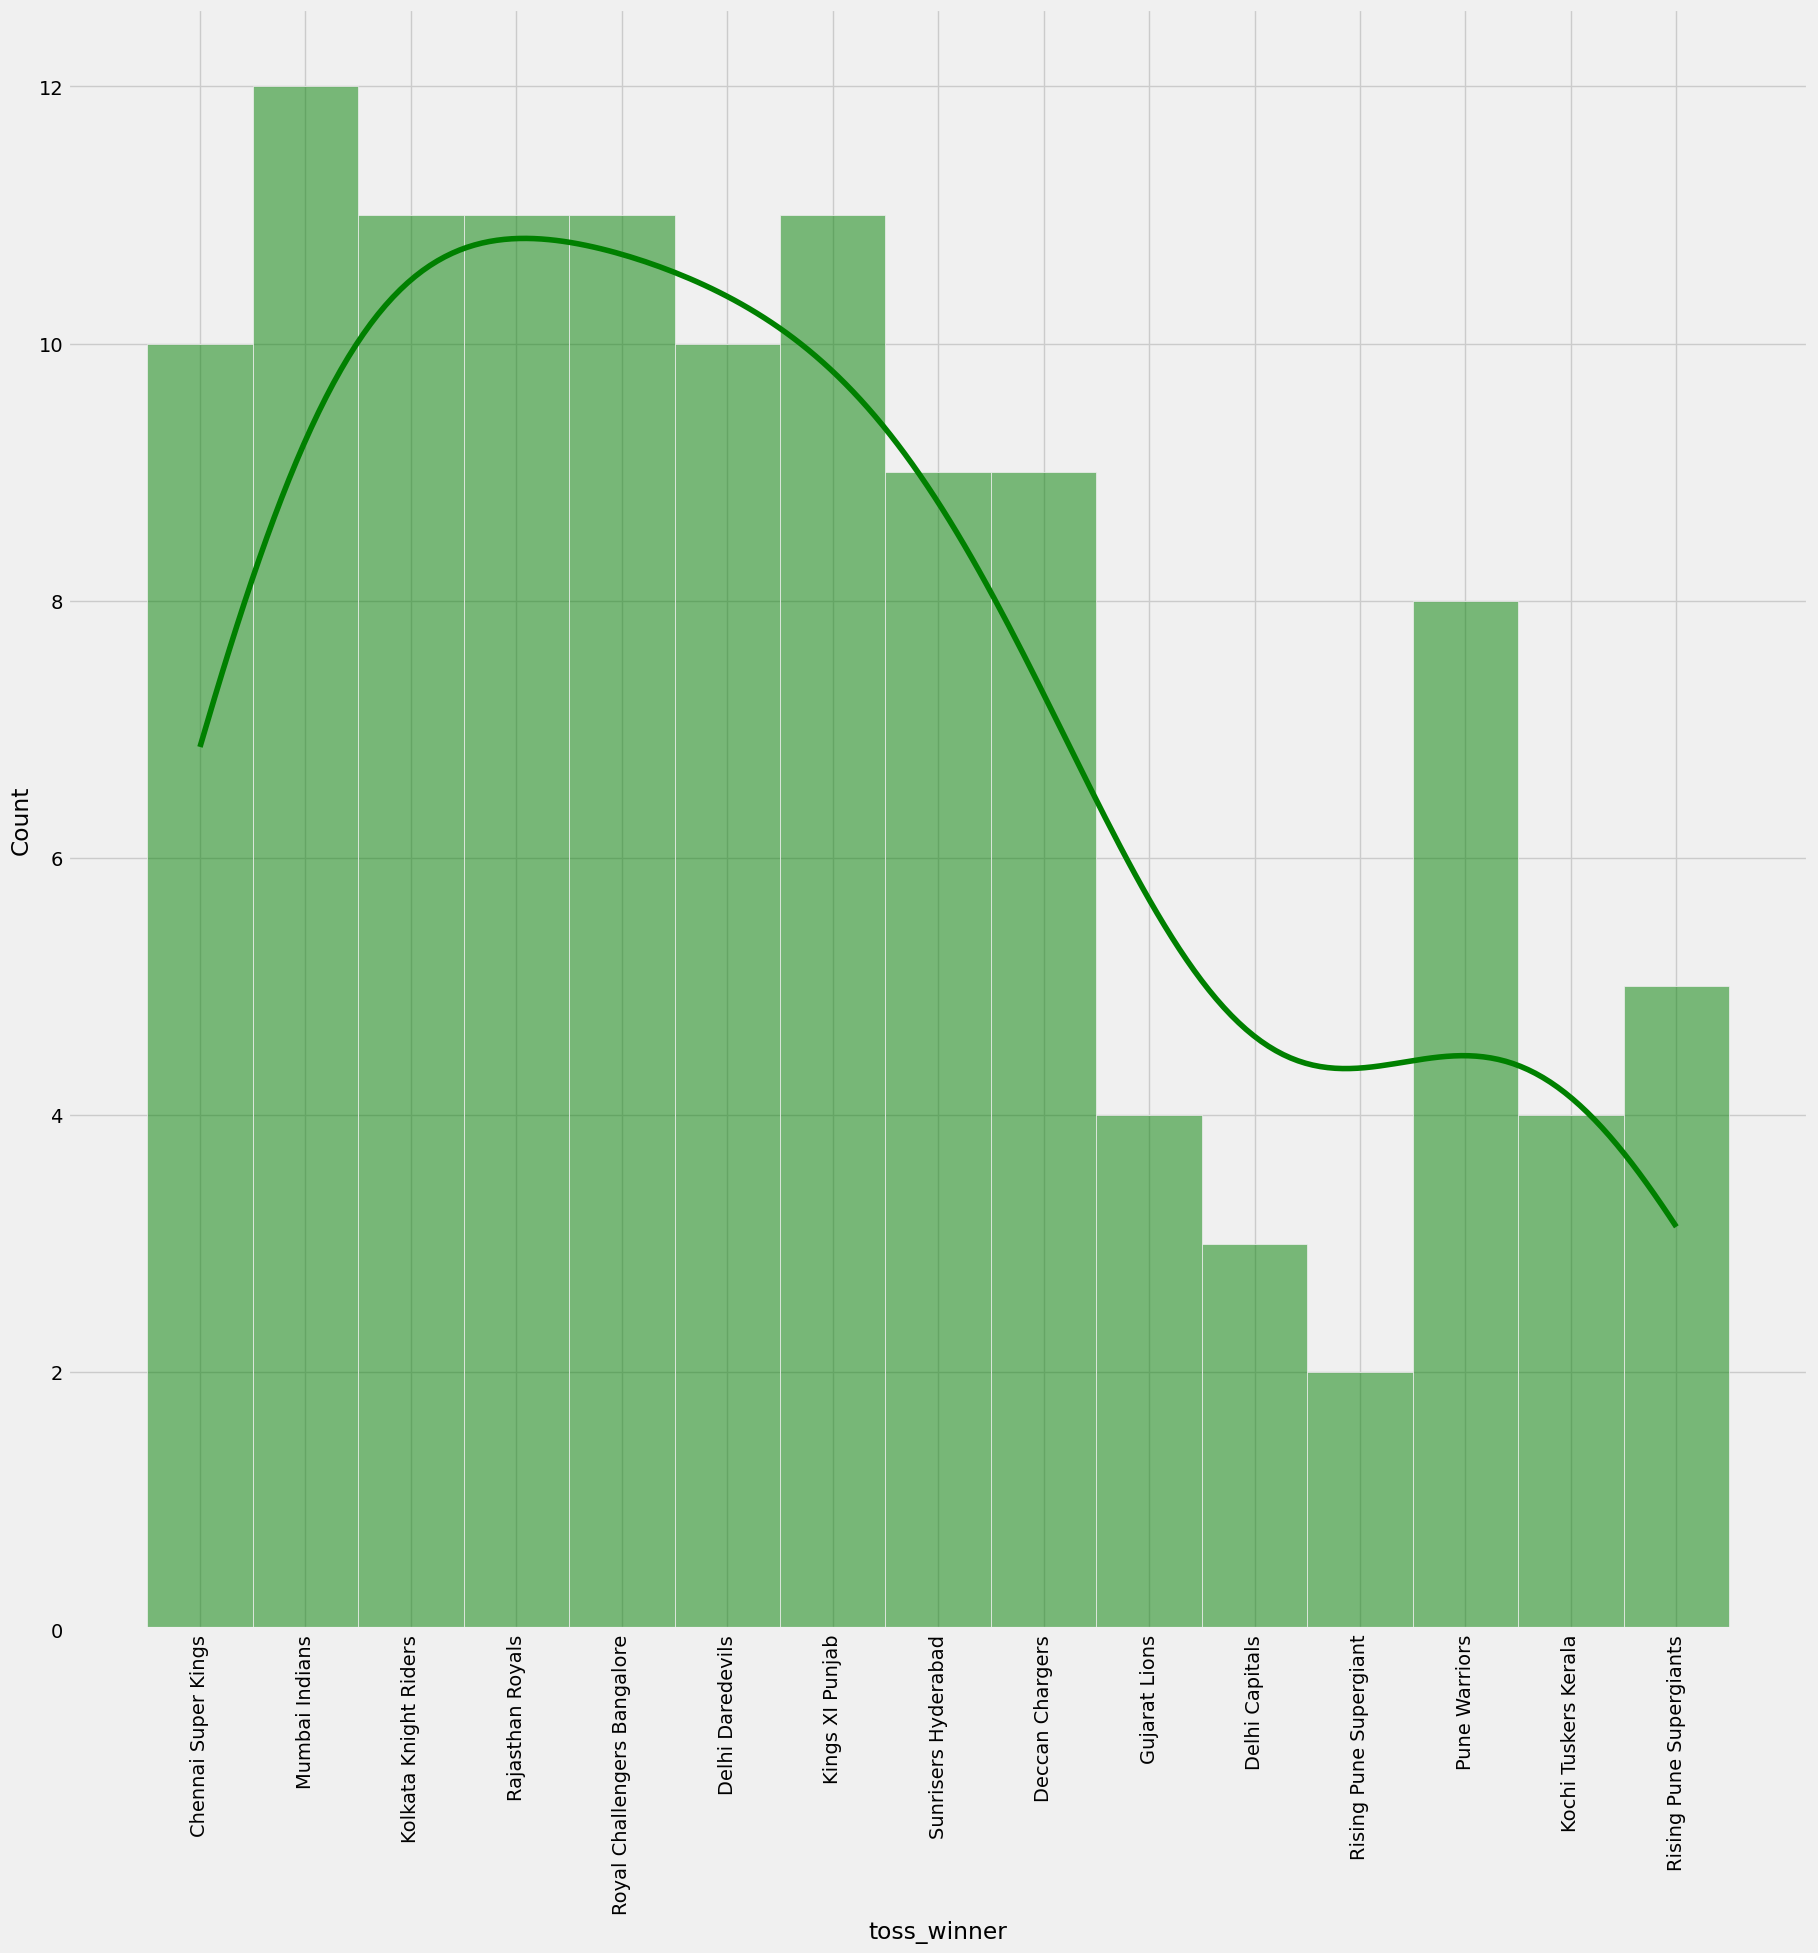

In [63]:
plt.figure(figsize=(20,20))
sns.histplot(data=mac2['toss_winner'],kde=True,color='green')
plt.xticks(rotation=90)
plt.show()

# Which team score more than 200

In [64]:
max_runs=de.groupby(['id','inning','batting_team','bowling_team']).aggregate({'total_runs':'sum'})
max_runs=max_runs[max_runs['total_runs']>=200]

In [65]:
max1=max_runs.nlargest(10,'total_runs').reset_index()

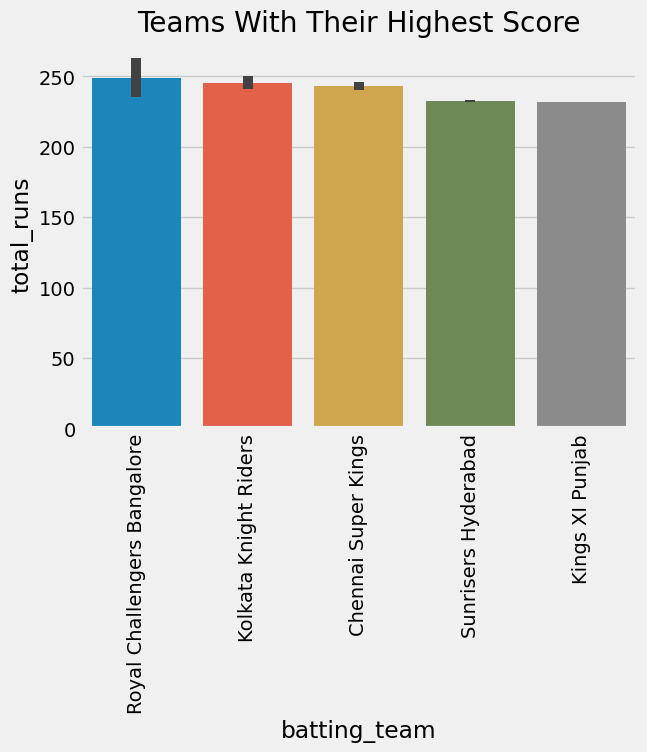

In [66]:
sns.barplot(data=max1,x='batting_team',y='total_runs')
plt.title('Teams With Their Highest Score')
plt.xticks(rotation=90)
plt.show()

#### That means that  teams have strong batsman

In [67]:
max_runs1=de.groupby(['id','inning','batting_team','bowling_team']).aggregate({'total_runs':'sum'}).reset_index()

In [68]:
max_runs1=max_runs1[(max_runs1['total_runs']>=200) & (max_runs1['inning']==2)]['bowling_team'].value_counts()

#  These teams are good  teams in chasing 

In [69]:
max_runs1

Kings XI Punjab                6
Chennai Super Kings            5
Royal Challengers Bangalore    5
Kolkata Knight Riders          4
Rajasthan Royals               3
Sunrisers Hyderabad            2
Gujarat Lions                  1
Deccan Chargers                1
Mumbai Indians                 1
Delhi Daredevils               1
Name: bowling_team, dtype: int64

insight = these are top chasing teams in which top is  kings XI punjab 

## Bowlers who gives extra runs as wide bowls

In [70]:
wide=de.groupby(['bowler']).aggregate({'total_runs':'sum'}).reset_index()

In [71]:
#These are to 20 bowlers which are suitable for batsman

In [72]:
top_20=wide.sort_values(by='total_runs',ascending=False).head(20)

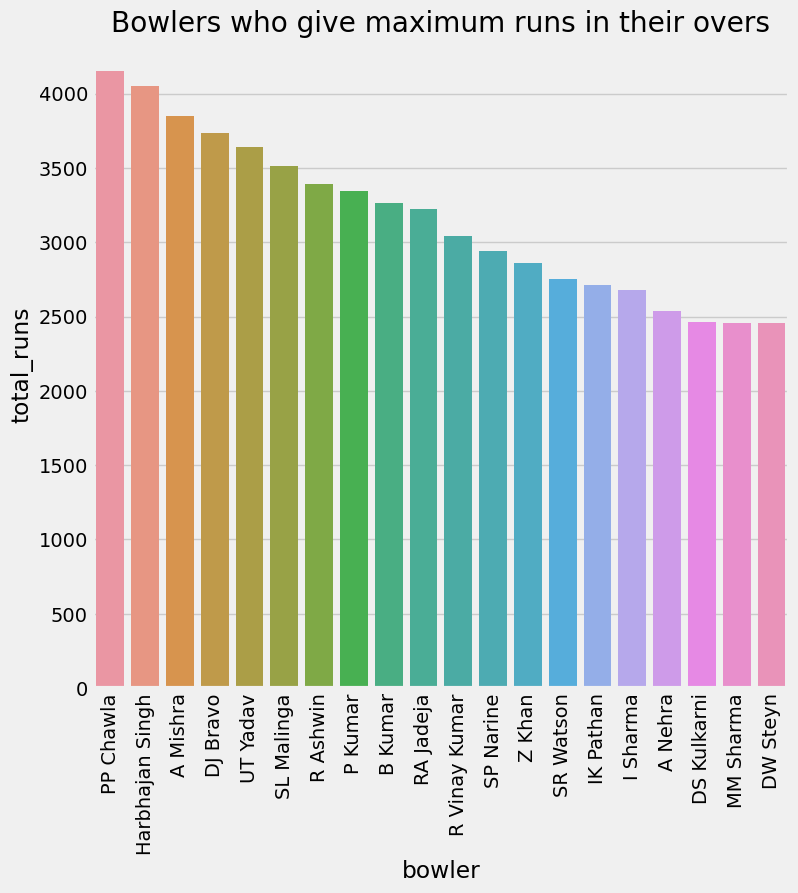

In [73]:
plt.figure(figsize=(8,8))
sns.barplot(x='bowler',y='total_runs',data=top_20)
plt.title('Bowlers who give maximum runs in their overs')
plt.xticks(rotation=90)
plt.show()

## Batsman who score maximum runs in dealth overs 

Generally Dealth over is last over of the match this over might decide winner or losser  because at that time batsman have maximum pressure the runs which are scored by them are deciding factor for their team winnig or lossing

In [74]:
dealth=de[(de['over']==20)].groupby(['batsman']).aggregate({'batsman_runs':'sum'}).reset_index()

In [75]:
deal=dealth.sort_values(by='batsman_runs',ascending=False).head(10)

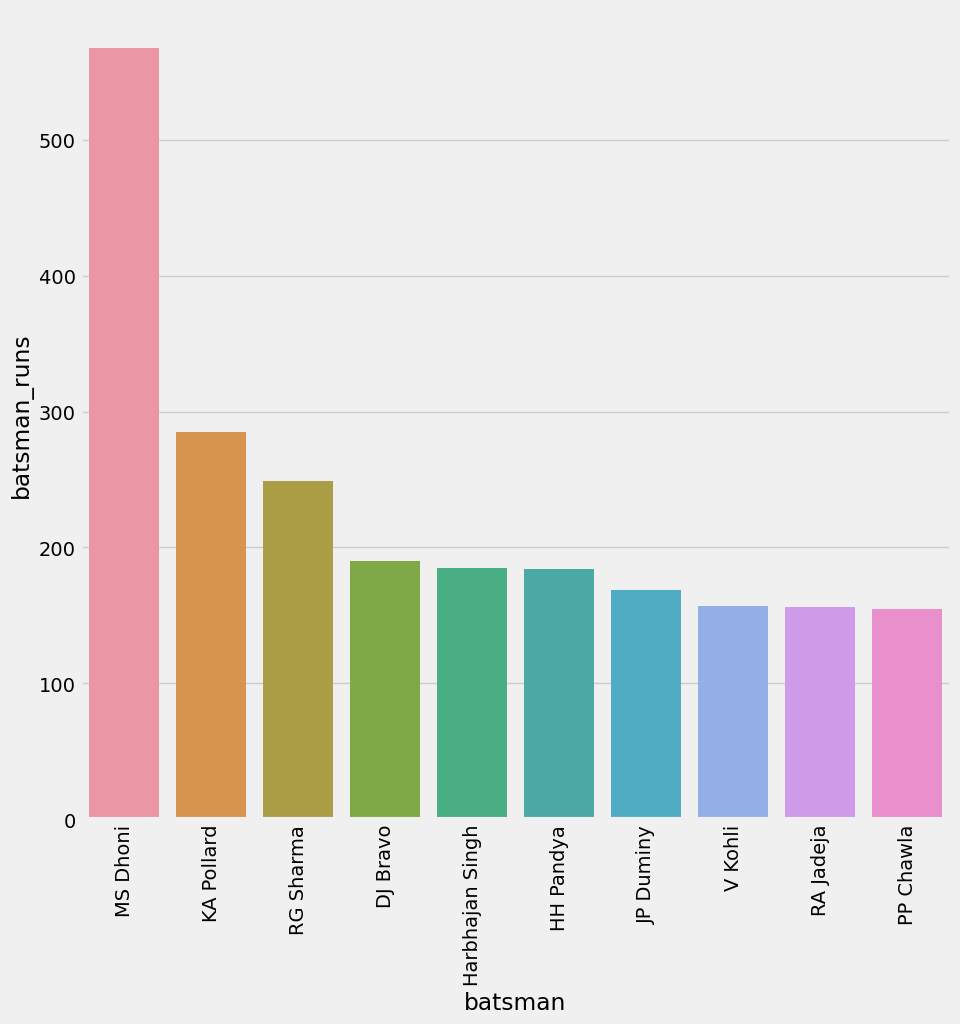

In [76]:
plt.figure(figsize=(10,10))
sns.barplot(data=deal,x='batsman',y='batsman_runs')
plt.xticks(rotation=90)
plt.show()

In [77]:
dealth1=de[(de['over']==20)&(de['inning']==2)].groupby(['batsman']).aggregate({'batsman_runs':'sum'}).reset_index()

In [78]:
dealth1=dealth1.sort_values(by='batsman_runs',ascending=False).head(20)

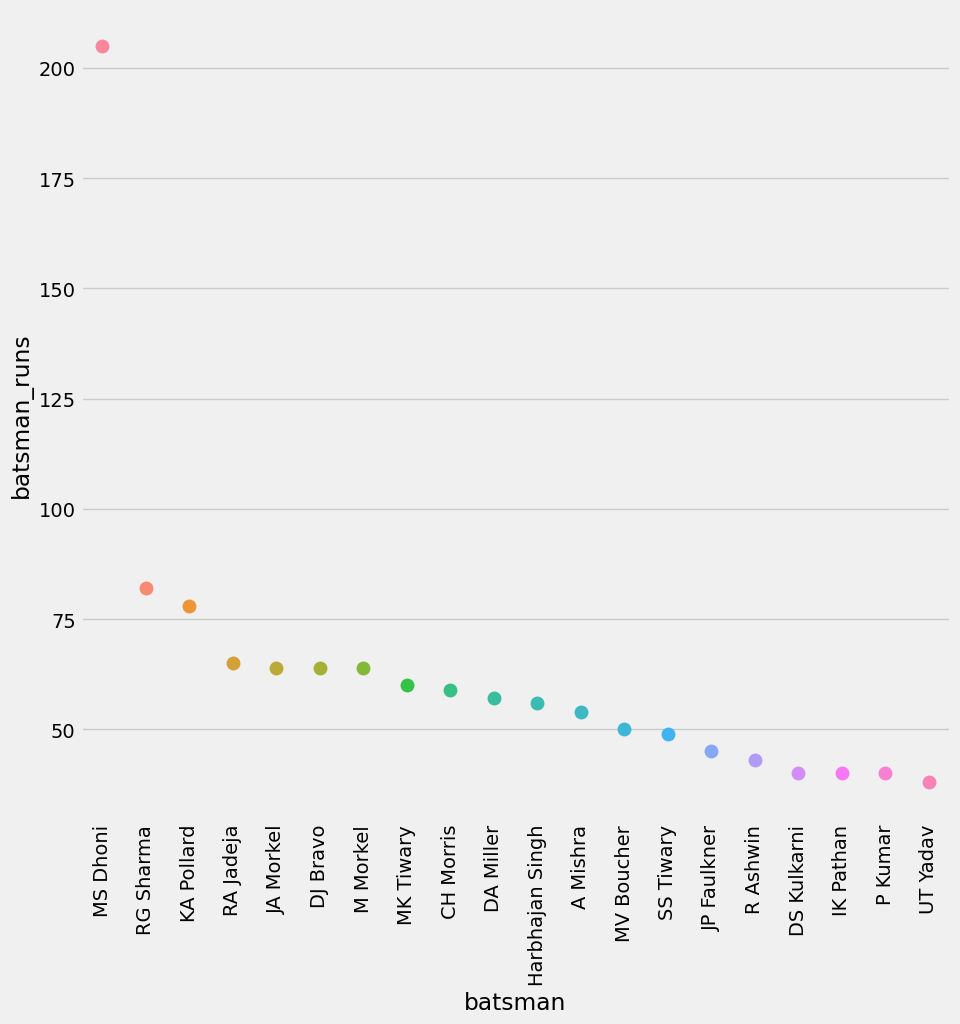

In [79]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=dealth1,x='batsman',y='batsman_runs',size=10)
plt.xticks(rotation=90)
plt.show()

#####  In both the innings MS dhoni is the consistent player  who score maximum runs in all the matches .

# Bowlers who give less runs in dealth overs

In [80]:
dea_bow=de[(de['over']==20)&(de['inning']==2)].groupby(['bowler']).aggregate({'total_runs':'sum'}).reset_index()

In [81]:
plot=dea_bow.sort_values(by='total_runs',ascending=True).head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

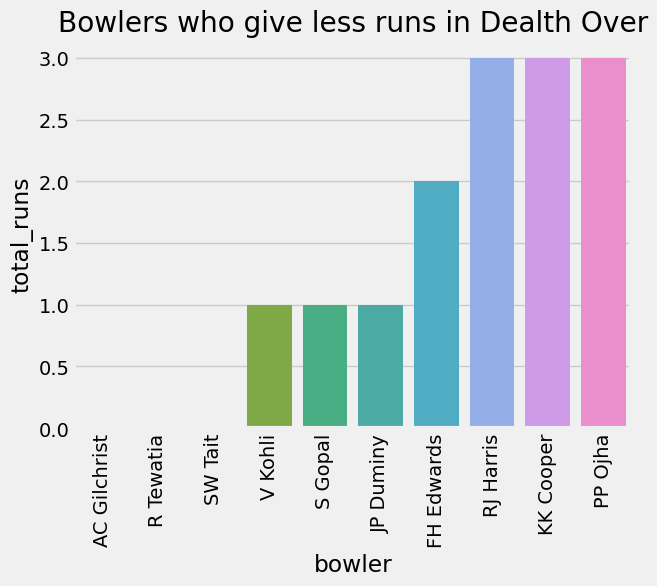

In [82]:
sns.barplot(data=plot,x='bowler',y='total_runs')
plt.title('Bowlers who give less runs in Dealth Over')
plt.xticks(rotation =90)
plt.show

Insight - these are the most reliable bowlers which give less runs in last over in seond over 

## Analysis Report  
### 1. Top Run chasing Team - Kolkata Night Riders
### 2. Top Winning by wicket Taking - Chenni Super KIng 
### 3. All over most matches played by Mumbai Indians And won by  Mumbai Indian
### 4. Malinga is the bowler  give most extra runs
### 5. Highest Run Scorer till now in IPL is Virat kohli
### 6. Umpire who present in maximum matches - S.ravi
### 7. Eden garden Cricket Stadium Kolkata hosts maximum 
### 8. Chennai super king is a team whow win most  of the toses
### 9. Chris henry gayle win most number of man of the matches
### 10. Ms Dhoni is the player who score most run in Death Over